<a href="https://colab.research.google.com/github/yijen-rena/hello-world/blob/master/HW2_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW2: Decision Tree** 
In *assignment 2*, you need to:

1.   Implement the decision tree in 3 steps (with the example data)


*   Step 1: calculate the entropy
*   Step 2: search for the best split
*   Step 3: build the decision tree

2.   Predict the patients' death (hospDIED) in the *MIMIC* dataset

Please fill in your **studentID** here.

In [61]:
STUDENT_ID = '107080072'

# **1. Implement the Decision Tree**
In the first part, you need to implement the decision tree by completing the given funcitions.

Also, you need to run those functions with given input variables and save the output to the implementation csv file **[STUDENT_ID]_implementation.csv**.

Implement a binary decision tree to classify *Restaurant* dataset.

## Import Packages

Note: You **cannot** import any other packages in the first part (implementation)!

In [62]:
import numpy as np
import pandas as pd
import random

## Load the Example Data
First, load the *Restaurant waiting* dataset: **data.csv**

In [63]:
example = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/data.csv')
example

,Unnamed: 0,Alternate,Bar,Friday,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Wait
0,X1,T,F,F,T,Some,High,F,T,French,8,T
1,X2,T,F,F,T,Full,Low,F,F,Thai,40,F
2,X3,F,T,F,F,Some,Low,F,F,Burger,8,T
3,X4,T,F,T,T,Full,Low,F,F,Thai,12,T
4,X5,T,F,T,F,Full,High,F,T,French,70,F
5,X6,F,T,F,T,Some,Medium,T,T,Italian,3,T
6,X7,F,T,F,F,None,Low,T,F,Burger,7,F
7,X8,F,F,F,T,Some,Medium,T,T,Thai,6,T
8,X9,F,T,T,F,Full,Low,T,F,Burger,80,F
9,X10,T,T,T,T,Full,High,F,T,Italian,20,F


In [64]:
example = example.drop(['Unnamed: 0'], axis=1)

In [138]:
# change the string categorical to integer labels
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

example['Alternate'] = labelencoder.fit_transform(example['Alternate'])
example['Bar'] = labelencoder.fit_transform(example['Bar'])
example['Friday'] = labelencoder.fit_transform(example['Friday'])
example['Hungry'] = labelencoder.fit_transform(example['Hungry'])
example['Patrons'] = labelencoder.fit_transform(example['Patrons'])
example['Price'] = labelencoder.fit_transform(example['Price'])
example['Raining'] = labelencoder.fit_transform(example['Raining'])
example['Reservation'] = labelencoder.fit_transform(example['Reservation'])
example['Type'] = labelencoder.fit_transform(example['Type'])

example

,Alternate,Bar,Friday,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Wait
0,1,0,0,1,2,0,0,1,1,8,T
1,1,0,0,1,0,1,0,0,3,40,F
2,0,1,0,0,2,1,0,0,0,8,T
3,1,0,1,1,0,1,0,0,3,12,T
4,1,0,1,0,0,0,0,1,1,70,F
5,0,1,0,1,2,2,1,1,2,3,T
6,0,1,0,0,1,1,1,0,0,7,F
7,0,0,0,1,2,2,1,1,3,6,T
8,0,1,1,0,0,1,1,0,0,80,F
9,1,1,1,1,0,0,0,1,2,20,F


## Calculating the Entropy *(20%)*


In [66]:
# split the data by given attribute and its threshold
def partition(data, column, threshold):
  """
  The *partition* function will split the input data into 2 branches.
    args:
    *   data(DataFrame): the input data
    *   column(str): the attribute(column name)
    *   threshold(float): the column's threshold for splitting the data
    returns:
    *   match_branch(DataFrame): the divided data that matches the assigned column's threshold
    *   false_branch(DataFrame): the divided data that doesn't match the assigned column's threshold
  """

  match_branch = []
  false_branch = []

  for idx, row in data.iterrows():
    if row[column] <= threshold:
      match_branch.append(row)
    else:
      false_branch.append(row)
  
  match_branch = pd.DataFrame(match_branch)
  false_branch = pd.DataFrame(false_branch)  

  return match_branch, false_branch

In [75]:
match,false = partition(example,'Patrons',1.5)
match = partition(match,'Hungry',0.5)

If we try *partition(example, 'Patrons', 1.5)*:

split example to 

match_left(Patrons<= 1.5) (Patrons != Some) and  
false_right(Patrons > 1.5) (Patrons == Some)

column: Patrons, threshold: 1.5



In [68]:
match_left, false_right = partition(example, 'Patrons', 1.5)
print(match_left.shape)
print(false_right.shape)
match_left.head()

(8, 11)
(4, 11)


,Alternate,Bar,Friday,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Wait
1,1,0,0,1,0,1,0,0,3,40,F
3,1,0,1,1,0,1,0,0,3,12,T
4,1,0,1,0,0,0,0,1,1,70,F
6,0,1,0,0,1,1,1,0,0,7,F
8,0,1,1,0,0,1,1,0,0,80,F


In [126]:
def entropy(data):
  """
  The *entropy* function will calculate the entropy of the node(data)
  args:
  *    data(DataFrame): the data you're calculating for the entropy
  output:
  *    entropy(float): the node(data)'s entropy     
  """

  ## p / n+p log2 ( p / n+p ) - n / n+p log2 ( n / n+p )

  count = data[data.columns[-1]].value_counts()

  ratios = []
  for c in count:
    ratios.append(c)
  ratios = np.array(ratios)
  ratios = np.divide(ratios,len(data)) # p / n+p, n / n+p

  neg_ratios = np.multiply(ratios,-1)

  log_ratios = np.log2(ratios)
  ratios = np.transpose(neg_ratios) * log_ratios

  entropy = np.sum(ratios)

  return entropy

In [95]:
match, false = partition(example, 'Hungry', 0.5)
entropy1 = entropy(match)
print(entropy1)

0.7219280948873623


# template example
An example of the output from entropy (Use this to check if your output is correct): 

In [80]:
match, false = partition(example, 'Hungry', 0.5)
entropy1 = entropy(match)
print(entropy1)

0.7219280948873623


In [81]:
#implementation 1: calculate the entropy of 'false' data
ans_entropy = entropy(false)
#print(ans_entropy)

## Find the Best Split *(20%)*

In [100]:
# search for the best attribute and the value(threshold) to split the data
def infoGain(entropy_before, data, column, threshold):
  match, false = partition(data, column, threshold)
  entropy_after = match.shape[0] / data.shape[0] * entropy(match) + false.shape[0] / data.shape[0] * entropy(false)
  return entropy_before - entropy_after

def findBestSplit(data):
    """
    The *findBestSplit* function finds the best combination of attribute and value(with the largest reduction in entropy) to split the data.
    args:
    *   data(DataFrame): the data you try to split(build the decision tree)
    output:
    *   column_best(str): the attribute(column) split with the largest reduction in entropy
    *   value_best(float): the value(threshold) of the column_best attribute to split the data
    """
    all_entropy = 9999        #the overall entropy : save the value of the smallest entropy
    column_best = 0
    value_best = 0

    ## 1) iterate columns
    ## 2) find count distinct values for each column and for each distinct mid points compute ig

    max_ig = -1.0
    entropy_before = entropy(data)

    for column in data.iloc[:,:-1]:
      thresholds = []
      values = np.array(data[column])
      values = np.sort(values)
      for i in range(len(values)-1):
        if values[i] != values[i+1]:
          thresholds.append((values[i] + values[i+1]) / 2)
      for t in thresholds:
        ig = infoGain(entropy_before, data, column, t)
        if ig > max_ig:
          max_ig = ig
          column_best = column
          value_best = t

    return column_best, value_best
  

An example of the output from findBestSplit (Use this to check if your output is correct):

In [101]:
column_best, value_best = findBestSplit(match)
print(column_best)
print(value_best)

Patrons
1.5


In [103]:
#implementation 2: Find the best split of the 'false' data
ans_column, ans_value = findBestSplit(false)
#print(ans_column)
#print(ans_value)

WaitEstimate
16.0


## Decision Tree Building *(30%)*

Use the above functions to help building the decision tree





In [118]:
decisionSubTree = []
features = []
thresholds = []

def buildTree(df, depth):
  """
  The *buildTree* function builds the decision tree
  args:
  *     df(DataFrame): the data you want to apply the decision tree
  *     depth(int) : the depth of your tree
  output:
  *     decisionSubTree(dict): the decision tree structure including root, branch, leaf(with the attributes and thresholds)
  *     features(list): the features(attributes) name in the decision tree structure(from root to branch and leaf)
  *     thresholds(list): the corresponding thresholds for the features in the 'features' list
  """

  if depth == 0 or entropy(df) == 0:
    #print(df)
    return

  column_best, value_best = findBestSplit(df)
  match,false = partition(df, column_best, value_best)
  #print(df)
  #print(column_best)
  features.append(column_best)
  thresholds.append(value_best)
  buildTree(match,depth-1)
  buildTree(false,depth-1)

  return decisionSubTree, features, thresholds

An example of the output from buildTree (Use this to check if your output is correct): 

In [114]:
tree, features, thresholds= buildTree(example, 2)
print(tree)
print(features)
print(thresholds)

[]
['Patrons', 'Hungry']
[1.5, 0.5]


In [117]:
#implementation 3: decision tree building (depth=10)
decisionSubTree = []
features = []
thresholds = []

ans_tree, ans_features, ans_thresholds = buildTree(example,10)
print(ans_features)
print(ans_thresholds)

['Patrons', 'Hungry', 'Friday', 'Price']
[1.5, 0.5, 0.5, 0.5]


In [119]:
#save implementation csv
decisionSubTree = []
features = []
thresholds = []

ans_path = STUDENT_ID + '_implementation.csv'

imp = []
imp.append(ans_entropy)
imp.append(ans_column)
imp.append(ans_value)
for i in range(len(ans_features)):
  imp.append(ans_features[i])
for m in range(len(ans_thresholds)):
  imp.append(ans_thresholds[m])
print(imp)
pd.DataFrame(imp).to_csv(ans_path, header = None, index = None)

[0.863120568566631, 'WaitEstimate', 16.0, 'Patrons', 'Hungry', 'Friday', 'Price', 1.5, 0.5, 0.5, 0.5]


# **2. Classification with the MIMIC Dataset**
In the second part, you need to classify **'hospDIED'(death)** in the MIMIC dataset.

Please put the classification result in a csv file. (**[STUDENTID]_prediction.csv**)

**Note:** Decision tree is recommended but not mandatory.

## Prediction (Performance) *(20%)*

The **y_test** (hospDIED) of this data is hidden, you need to use the x_test.csv to predict the y_test.

**Note:** You **can** now import the packages you need here!

Get the MIMIC data here!

Data Description: 

[Data Description](https://docs.google.com/spreadsheets/d/1pxqxQFhIcv_hrgWEtwhXE6zBVQ5ISa-13PIhvXMtWCY/edit?usp=sharing) (You can find the data description here.)

**Note:**
*   You can select the features you want to use.
*   You can use any ML models to predict the y_test.

  (However, there is a 10% bonus if you **visualize** the decision tree in this part)


[ref]: *Johnson, A. E. W., Pollard, T. J., Shen, L., Lehman, L. H., Feng, M., Ghassemi, M., Moody, B., Szolovits, P., Celi, L. A., & Mark, R. G. (2016). MIMIC-III, a freely accessible critical care database. Scientific Data, 3, 160035.*


In [182]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt

In [20]:
#Read data
x_train = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/x_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/y_train.csv')
x_train.head()

,subject_id,age,los,CA,DNR,CMO,DNI,indextime,female,first_careunit,...,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10246985,48,1.826250,0,0,0,0,30JUN38:20:25:48,1,10,...,2,9,9,9,9,0,9,9,0,9
1,14538806,59,10.581123,0,0,0,0,03SEP59:14:15:14,1,10,...,4,4,4,4,4,4,4,4,4,4
2,12850130,73,2.065255,0,0,0,0,30SEP87:20:50:56,1,4,...,4,4,4,4,4,4,4,4,4,4
3,11810761,84,1.435428,0,0,0,0,06JUN22:11:36:44,1,10,...,0,9,9,0,9,0,9,1,9,9
4,13109236,66,1.443414,0,0,0,0,25MAR31:21:09:15,0,1,...,4,4,4,4,4,4,4,4,4,4


Complete your model with validation:

In [178]:
#Split the data into training and validation sets
#Build you model and evaluate it on your validation set

x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [181]:
# preprocessing: encode column names to integers
def encode(df):
    df_mod = df.copy()
    for column in df.columns:
        df_mod[column] = labelencoder.fit_transform(df_mod[column])
    return df_mod

x_tra = encode(x_tra)
y_tra = encode(y_tra)
x_val = encode(x_val)
y_val = encode(y_val)

print(x_tra.shape)
print(x_val.shape)

(19712, 84)
(4929, 84)


In [180]:
# model: fitting the decision tree
dt = tree.DecisionTreeClassifier()
mimic_dt = dt.fit(x_tra,y_tra)

In [165]:
# validation
y_val_pred = mimic_dt.predict(x_val)

# f1 score
f1 = sklearn.metrics.f1_score(y_val['hospDIED'],y_val_pred)
print(f1)

0.3988803358992302


Make the final prediction from your model:

In [160]:
x_test = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/x_test.csv')

x_test = encode(x_test)

y_pred = mimic_dt.predict(x_test)

print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
#final prediction with your decision tree(optional)
def treePredictions(df, tree):

  return predictions

To export your predcition as a CSV file and hand in the CSV on elearn

In [166]:
output_path = STUDENT_ID + '_prediction.csv'

tree_test_pred = pd.DataFrame( {'subject_id': x_test.subject_id,
                  'prediction': y_pred } )
tree_test_pred.to_csv(output_path, index = False)

## Visualizing the Decision Tree *(10% bonus)*

**Note:** Save the visualization result image as **[STUDENT_ID]_visualization.png**

*   Your visualization image of the decision tree can contain **five** layers at most.


[Text(240.11645899254245, 214.24235294117648, 'X[57] <= 0.5\ngini = 0.24\nsamples = 19712\nvalue = [16967, 2745]'),
 Text(173.4929814653319, 207.8470588235294, 'X[5] <= 0.5\ngini = 0.129\nsamples = 15204\nvalue = [14152, 1052]'),
 Text(163.6331411982939, 201.45176470588234, 'X[3] <= 0.5\ngini = 0.115\nsamples = 15066\nvalue = [14141, 925]'),
 Text(146.71715589882874, 195.0564705882353, 'X[2] <= 15882.5\ngini = 0.107\nsamples = 14963\nvalue = [14113, 850]'),
 Text(123.16804167509275, 188.66117647058823, 'X[4] <= 0.5\ngini = 0.081\nsamples = 13695\nvalue = [13114, 581]'),
 Text(104.7937070582254, 182.26588235294116, 'X[68] <= 0.5\ngini = 0.075\nsamples = 13563\nvalue = [13033, 530]'),
 Text(77.69805163588734, 175.87058823529412, 'X[45] <= 8.5\ngini = 0.066\nsamples = 13038\nvalue = [12596, 442]'),
 Text(40.479474716026026, 169.47529411764705, 'X[9] <= 1.5\ngini = 0.055\nsamples = 11957\nvalue = [11616, 341]'),
 Text(18.28608884798317, 163.07999999999998, 'X[63] <= 0.5\ngini = 0.024\nsamp

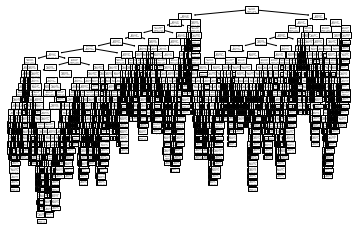

In [183]:
#Decision Tree Visualization
feature_names = []
for column in x_train.columns:
    
tree.plot_tree(mimic_dt)

# Report *(10%)*

Report should be submitted as a pdf file! (**[STUDENT_ID]_report.pdf**)

*   List the top 3 splitting features and their thresholds of your model
*   Briefly describe how you build the decision tree
*   Describe if you apply any improvement on your decision tree model
*   If you preprocess the MIMIC data in the second part (selecting features...), describe the work and reasons
*   Summarize your work
*   Do not exceed 2 pages!






# Save the Code File
Please save your code and submit it as an ipynb file! (**[STUDENT_ID]_hw2.ipynb**)